### Welcome to my first DL project on the KMNIST database.
The KMNIST (Kuzushiji-MNIST) database is a dataset of handwritten Japanese characters, specifically the Hiragana script. It serves as a more challenging alternative to the traditional MNIST dataset. KMNIST consists of 70,000 grayscale images, each 28x28 pixels, divided into 60,000 training images and 10,000 test images. The dataset includes 10 classes, representing different Hiragana characters. KMNIST is widely used for benchmarking machine learning algorithms and deep learning models, offering a unique test for character recognition tasks due to its complexity and cultural specificity.

If you want to run this notebook on your device, follow the below steps.
1. Google Colab:
   * Change your runtime type to T4 GPU for faster execution time.
   * Check cuda availability by -> `import torch` -> `torch.cuda.is_available()`
   * If cuda is not available, you can still run it, but it will take longer.
   * If you experience any `module not found errors`, make use of `pip install (root module name)` and run it.
2. JuPyter Notebook:
   * Make sure to import the `.ipynb` file properly.
   * Integrate GPU to the working environment.
   * Test cuda availability through the steps mentioned for GC.
   
     

## Check Cuda Availability

In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Import neccessary dependancies

In [3]:
from torch.utils.data import DataLoader, Dataset

In [4]:
#Import neccessary dependencies
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [5]:
print(torchvision.__version__)

0.18.0+cu121


## Load the KMNIST database

In [6]:
#Setting up data
train_data = datasets.KMNIST(root='data',
                            train=True,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)

test_data = datasets.KMNIST(root='data',
                            train=False,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)

100%|██████████| 18165135/18165135 [00:18<00:00, 970086.33it/s] 


Extracting data/KMNIST/raw/train-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 201873.83it/s]


Extracting data/KMNIST/raw/train-labels-idx1-ubyte.gz to data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 821999.61it/s]


Extracting data/KMNIST/raw/t10k-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 10299681.76it/s]

Extracting data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to data/KMNIST/raw



In [7]:
len(test_data), len(train_data)

(10000, 60000)

In [8]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.4627, 1.0000, 1.0000, 0.4863, 0.0039,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1412, 0.9333, 1.0000, 0.5725, 0.0078, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0471, 0.7961, 1.0000, 0.8627, 0.0549, 0.0000, 0.0000,
           0.0000, 0.0431, 0.5176, 0.3725, 0.7333, 0.3725, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.5843, 1.0000, 0.9843, 0.2588, 0.0000, 0.0000, 0.0000,
           0.0275, 0.6588, 0.5333, 0.0392, 

In [9]:
# Checking our classes/ feature labels
classes = train_data.classes
classes

['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']

In [10]:
#Checking our image shape and class it is categorized into:
print(f"Image shape: {image.shape} | Label: {classes[label]}")

Image shape: torch.Size([1, 28, 28]) | Label: re


## For better understading of the data we have to visualize it using matplotlib

In [11]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

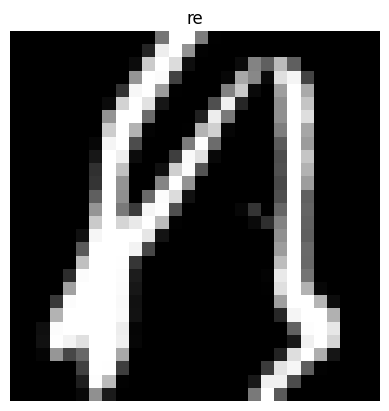

In [12]:
plt.imshow(image.squeeze(dim=0), cmap='gray')
plt.title(classes[label])
plt.axis(False)

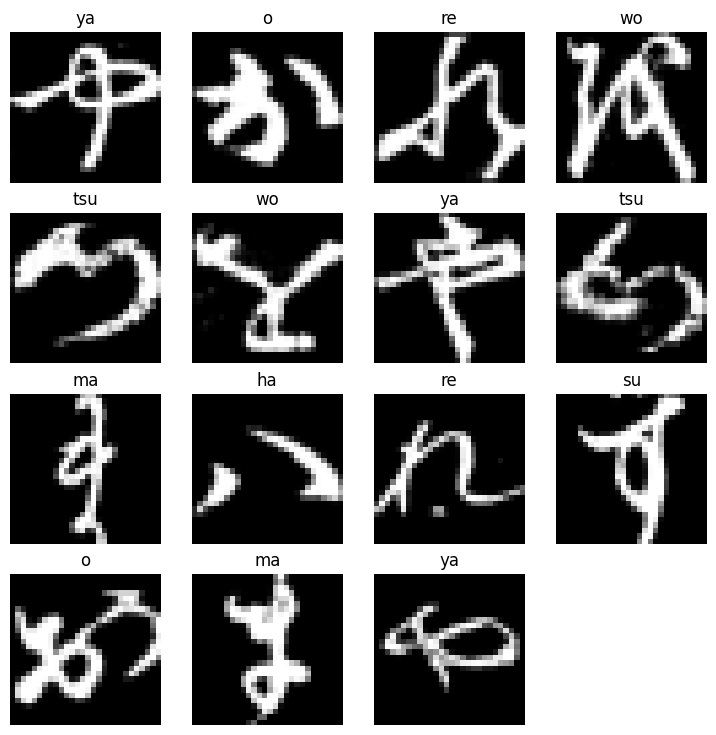

In [13]:
# Plot a set of images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(classes[label])
    plt.axis(False)

## Now we prepare our batches to be ready for training

In [14]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32 # batch size hyper parameter

train_dataloader = DataLoader(batch_size=BATCH_SIZE,
                             shuffle=True,
                             dataset=train_data)

test_dataloader = DataLoader(batch_size=BATCH_SIZE,
                            shuffle=False,
                            dataset=test_data)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x799388e73070>,
 <torch.utils.data.dataloader.DataLoader at 0x799388e728c0>)

In [15]:
# We check lengths of train/test dataloaders
len(train_dataloader), len(test_dataloader)
#Each of them are of size 32

(1875, 313)

In [16]:
#We create feature label sub batches
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

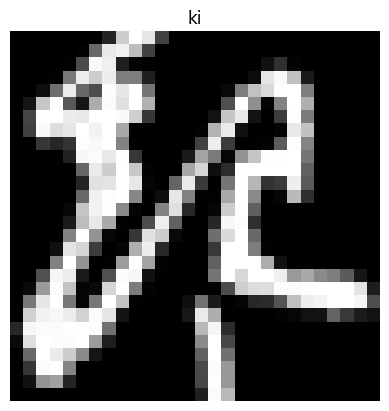

In [17]:
# We check a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(classes[label])
plt.axis(False)

## Now we provide device agnostic code

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## Now we functionize our train test loops


In [19]:
def train_loop(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               accuracy_fn,
               loss_fn: nn.Module,
              optimizer: torch.optim,
              device:torch.device=device):
    train_loss, train_acc = 0, 0
    model.train()

    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        y_logits = model(X)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                            y_pred= y_logits.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%')



In [20]:
def test_loop(model: nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: nn.Module,
             accuracy_fn,
             device: torch.device=device):
    test_acc, test_loss = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            test_loss += loss_fn(y_logits, y)
            test_acc += accuracy_fn(y_true=y,
                                   y_pred=y_logits.argmax(dim=1))

        test_acc /= len(data_loader)
        test_loss /= len(data_loader)
        print(f'Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%')




## Now we create our model

In [21]:
class KMNISTmodel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features = output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [22]:
torch.manual_seed(42)
model = KMNISTmodel(input_shape=1,
                    hidden_units=10,
                   output_shape=len(classes)).to(device)
model

KMNISTmodel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)


In [24]:
image.shape

torch.Size([1, 28, 28])

In [25]:
pred = model(image.unsqueeze(dim=1).to(device))
pred.shape

torch.Size([1, 10])

In [26]:
def print_tt(start: float,
            end: float,
            device: torch.device=None):
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds.")
    return total_time

## Now we train the model

In [27]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_loop(accuracy_fn=accuracy_fn,
              loss_fn=loss_fn,
              model=model,
              data_loader=train_dataloader,
              optimizer=optimizer,
              device = device)
    test_loop(model=model,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

    end_time = timer()
    total_time = print_tt(start=start_time,
                         end=end_time,
                         device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 0.47938 | Train Acc: 84.69%
Test Loss: 0.47515, Test Acc: 85.41%
Train time on cpu: 64.711 seconds.
Epoch: 1
----
Train Loss: 0.17420 | Train Acc: 94.74%
Test Loss: 0.41767, Test Acc: 88.40%
Train time on cpu: 124.133 seconds.
Epoch: 2
----
Train Loss: 0.13933 | Train Acc: 95.75%
Test Loss: 0.39128, Test Acc: 89.12%
Train time on cpu: 183.297 seconds.


## Now we make a confusion matrix

In [28]:
y_preds = []
model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader):
        X, y =X.to(device), y.to(device)
        y_logits = model(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([2, 9, 2,  ..., 2, 8, 6])

In [29]:
test_data.targets

tensor([2, 9, 3,  ..., 9, 4, 2])

In [32]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

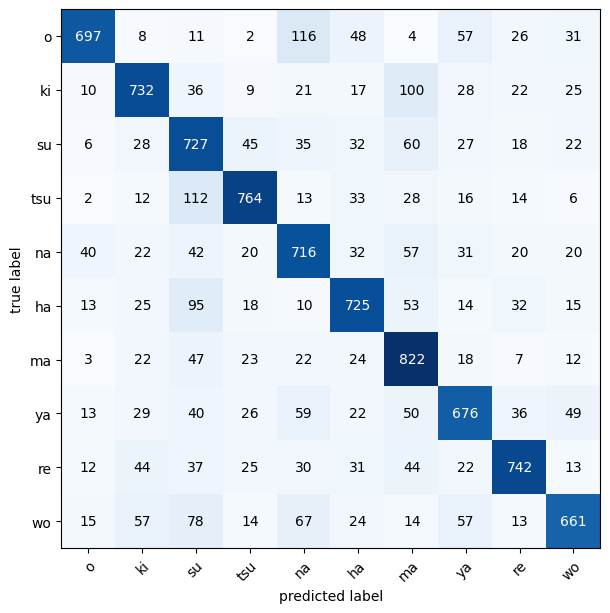

In [33]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classes), task = 'multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classes,
    figsize=(10,7)
)